In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import seaborn as sns
import pickle

import functions as fun

# Quick data plot

(0.0, 1.1)

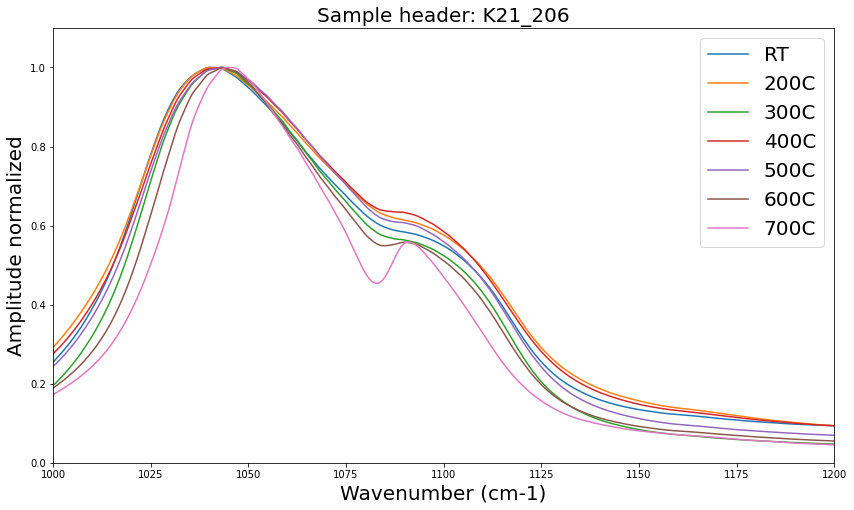

In [270]:
# Quickly plot a given data set
temps = {'RT':0,'200C':200,'300C':300,'400C':400,'500C':500,'600C':600,'700C':700}
path  = 'Bone oven FTIR results baselined/'
header = 'K21_206'

plt.figure(figsize=(14,8))
for T in temps:
    spectra = pd.read_csv(path+header+' '+T+'.csv',names=['w','amp'],header=None)
    plt.plot(spectra['w'],spectra['amp']/max(spectra['amp']))
    
plt.title('Sample header: '+header,fontsize=20)
plt.xlabel('Wavenumber (cm-1)',fontsize=20)
plt.ylabel('Amplitude normalized',fontsize=20)
plt.legend(temps.keys(),fontsize=20)

#range of plot
plt.xlim([1000, 1200])
plt.ylim([0, 1.1])
    
    
    

# Track central freq and mode amplitudes for entire data set

Format of dataframe:

index: sample
columns: 560 w, 560 amp

        610 w, 610 amp
        560/610 peak to peak ratio
        650 shoulder
        870 w, 870 amp
        
        1040 w
        1425 w, 1425 amp
        3400 w, 3400 amp
        
        

In [285]:
# Data set path
path = 'Bone oven FTIR results baselined/'
# sample headers
sample_header = ['12',
              '3',
              'I21_69',
              'J18_20',
              'K21_206',
              'K21_375',
              'M15_77',
              'M22_8',
              'N16_74'
              #'W15_1', # data set removed for not being a bone
              ]
# Sample temperatures
temps = {'RT':0,'200C':200,'300C':300,'400C':400,'500C':500,'600C':600,'700C':700}

data_dict = {} # dictionary to store all the data sets and sample names
frames = []    # list to store individual data features before combining into complete dataframe 
colnames = ['w','amp']

# Create feature dataframe for all of the training data
# Loop through sample header names and temperatures
# External function 'feature_setup' calculates the quantitative features
for header in sample_header:
    for T in temps:
        sample_name = header+' '+T
        data = pd.read_csv(path+sample_name+'.csv',names=colnames,header=None)
        
        temp_df = fun.feature_setup(data) # setup features on spectra data
        temp_df['sample'] = sample_name   # include sample name as column
        temp_df['temperature'] = temps[T] # include sample temperature as a column
        
        frames = frames + [temp_df]       # create list of individual data features
        
        data['amp'] = data['amp']/max(data['amp']) # Normalize data to largest peak to store in data dictionary
        data_dict[sample_name] = data # store spectra data in dictionary for ease of use
        
feature_df = pd.concat(frames,ignore_index=True) # Combine individual data features into one dataframe

In [288]:
feature_df.head()

,560 w,560 amp,610 w,610 amp,560/610,645 shoulder,645/610,865 shoulder,870 w,870 amp,865/870,1040 w,1425 w,1425 amp,3400 w,3400 amp,sample,temperature
0,565.52290,0.34765,604.09230,0.33416,1.04038,0.05580,0.16698,0.06222,872.63130,0.07813,0.79634,"1,040.40800","1,422.24500",0.22311,"3,424.47600",0.17369,12 RT,0
1,565.52290,0.36058,604.09230,0.34418,1.04766,0.05781,0.16796,0.06999,872.14920,0.08262,0.84711,"1,039.92600","1,422.24500",0.22554,"3,425.92200",0.17015,12 200C,200
2,565.52290,0.36271,604.09230,0.35798,1.01322,0.06312,0.17633,0.07138,872.14920,0.08152,0.87560,"1,042.81900","1,420.31600",0.23243,"3,448.09900",0.20136,12 300C,300
3,566.48720,0.32047,604.09230,0.33015,0.97067,0.04369,0.13233,0.04303,872.14920,0.05201,0.82744,"1,043.30100","1,420.31600",0.18437,"3,431.70700",0.21873,12 400C,400
4,566.48720,0.31984,604.09230,0.33634,0.95094,0.04284,0.12737,0.04853,872.14920,0.05529,0.87771,"1,043.78300","1,420.31600",0.19896,"3,431.70700",0.21099,12 500C,500


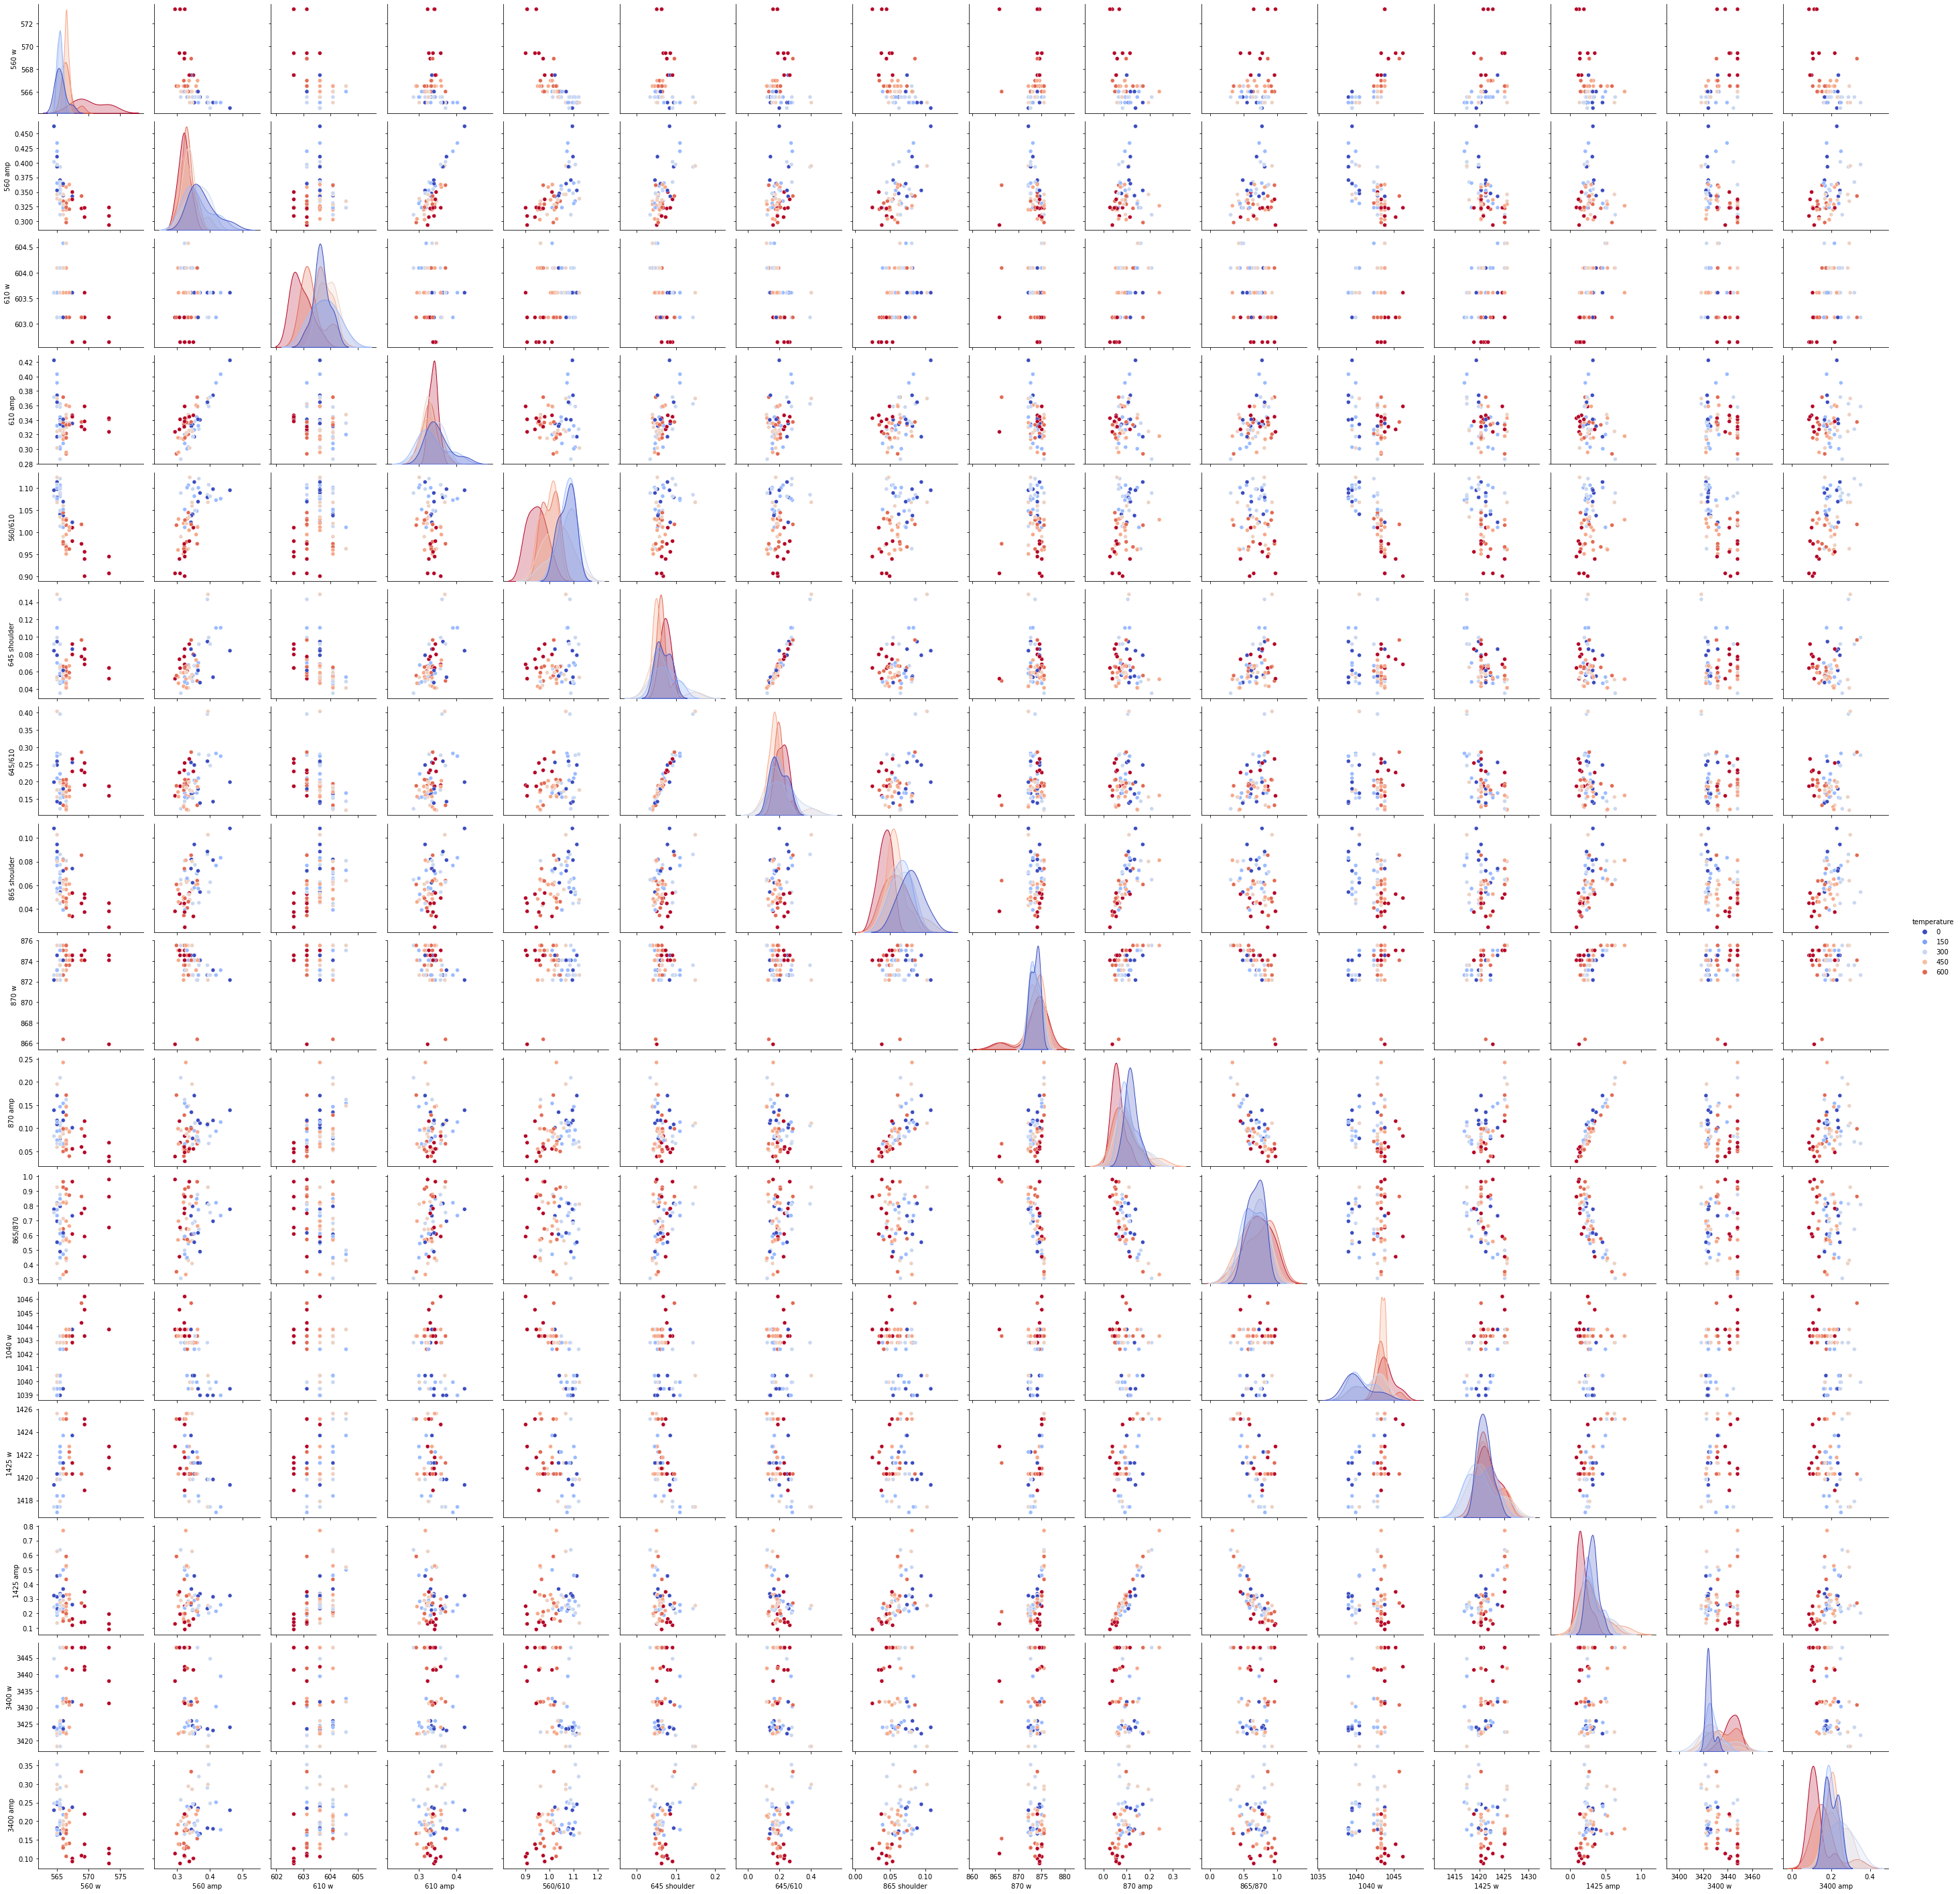

In [435]:
# Pair plot of entire feature dataframe. 
sns.pairplot(feature_df,hue='temperature',palette='coolwarm')

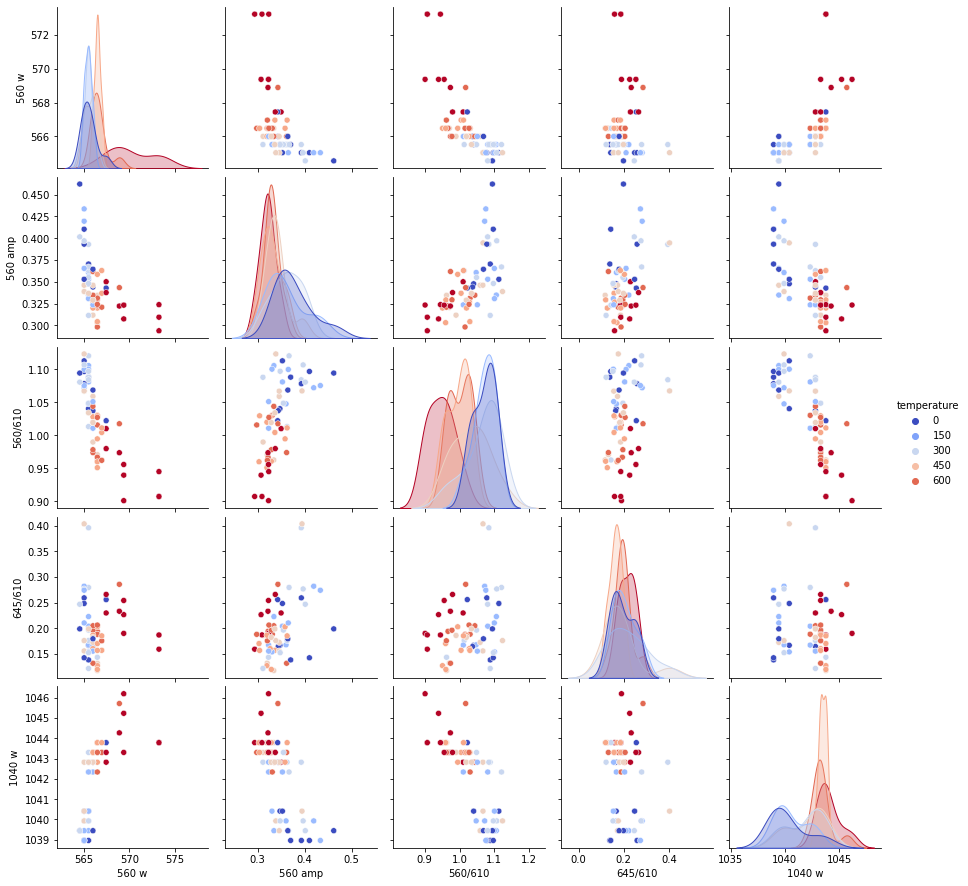

In [437]:
# selected features 
sns.pairplot(data=feature_df[['temperature','560 w','560 amp','560/610',
                             '645/610','1040 w']],hue='temperature',palette='coolwarm')

In [14]:
# calculate average feature dataframe
avg_df = pd.DataFrame(data=[]) # initialize average value df
for T in temps:
    temp_dict = {}
    temp_dict['temperature'] = temps[T]
    temp_dict['560 w'] = feature_df[feature_df['temperature']==temps[T]]['560 w'].mean()
    temp_dict['560 w std'] = feature_df[feature_df['temperature']==temps[T]]['560 w'].std()
    temp_dict['560 amp'] = feature_df[feature_df['temperature']==temps[T]]['560 amp'].mean()
    temp_dict['560 amp std'] = feature_df[feature_df['temperature']==temps[T]]['560 amp'].std()
    
    temp_dict['610 w'] = feature_df[feature_df['temperature']==temps[T]]['610 w'].mean()
    temp_dict['610 w std'] = feature_df[feature_df['temperature']==temps[T]]['610 w'].std()
    temp_dict['610 amp'] = feature_df[feature_df['temperature']==temps[T]]['610 amp'].mean()
    temp_dict['610 amp std'] = feature_df[feature_df['temperature']==temps[T]]['610 amp'].std()
    
    temp_dict['560/610'] = feature_df[feature_df['temperature']==temps[T]]['560/610'].mean()
    temp_dict['560/610 std'] = feature_df[feature_df['temperature']==temps[T]]['560/610'].std()
    
    temp_dict['645 shoulder'] = feature_df[feature_df['temperature']==temps[T]]['645 shoulder'].mean() 
    temp_dict['645 shoulder std'] = feature_df[feature_df['temperature']==temps[T]]['645 shoulder'].std() 
    temp_dict['645/610'] = feature_df[feature_df['temperature']==temps[T]]['645/610'].mean() 
    temp_dict['645/610 std'] = feature_df[feature_df['temperature']==temps[T]]['645/610'].std()
    
    temp_dict['870 w'] = feature_df[feature_df['temperature']==temps[T]]['870 w'].mean()
    temp_dict['870 w std'] = feature_df[feature_df['temperature']==temps[T]]['870 w'].std()
    temp_dict['870 amp'] = feature_df[feature_df['temperature']==temps[T]]['870 amp'].mean()
    temp_dict['870 amp std'] = feature_df[feature_df['temperature']==temps[T]]['870 amp'].std()
    
    temp_dict['865 shoulder'] = feature_df[feature_df['temperature']==temps[T]]['865 shoulder'].mean() 
    temp_dict['865 shoulder std'] = feature_df[feature_df['temperature']==temps[T]]['865 shoulder'].std() 
    temp_dict['865/870'] = feature_df[feature_df['temperature']==temps[T]]['865/870'].mean() 
    temp_dict['865/870 std'] = feature_df[feature_df['temperature']==temps[T]]['865/870'].std()
    
    temp_dict['1040 w'] = feature_df[feature_df['temperature']==temps[T]]['1040 w'].mean()
    temp_dict['1040 w std'] = feature_df[feature_df['temperature']==temps[T]]['1040 w'].std()

    temp_dict['1425 w'] = feature_df[feature_df['temperature']==temps[T]]['1425 w'].mean()
    temp_dict['1425 w std'] = feature_df[feature_df['temperature']==temps[T]]['1425 w'].std()
    temp_dict['1425 amp'] = feature_df[feature_df['temperature']==temps[T]]['1425 amp'].mean()
    temp_dict['1425 amp std'] = feature_df[feature_df['temperature']==temps[T]]['1425 amp'].std()
    
    temp_dict['3400 w'] = feature_df[feature_df['temperature']==temps[T]]['3400 w'].mean()
    temp_dict['3400 w std'] = feature_df[feature_df['temperature']==temps[T]]['3400 w'].std()
    temp_dict['3400 amp'] = feature_df[feature_df['temperature']==temps[T]]['3400 amp'].mean()
    temp_dict['3400 amp std'] = feature_df[feature_df['temperature']==temps[T]]['3400 amp'].std()
    
    avg_df = avg_df.append(temp_dict,ignore_index=True)

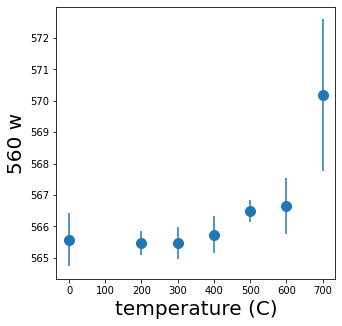

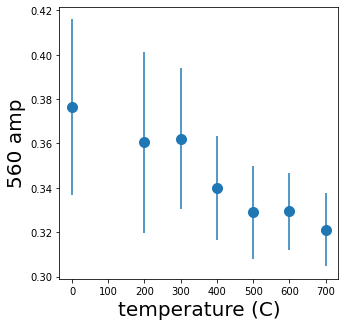

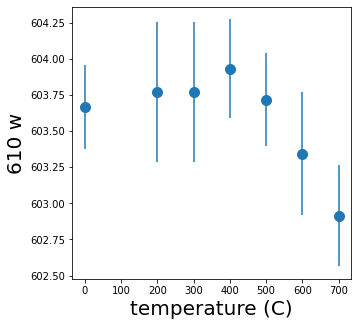

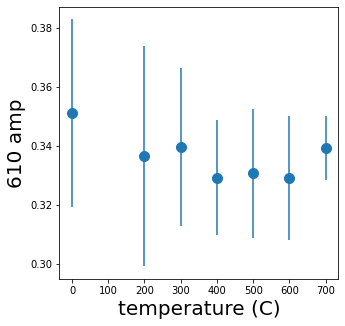

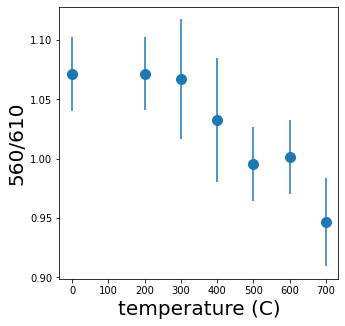

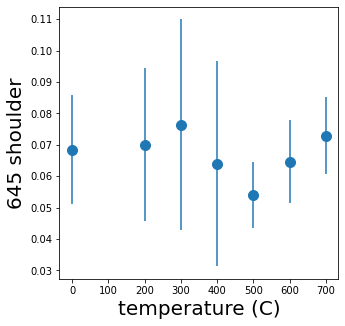

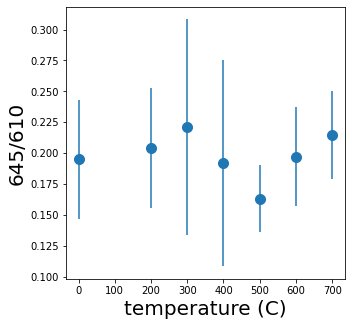

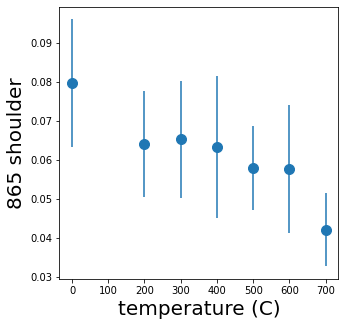

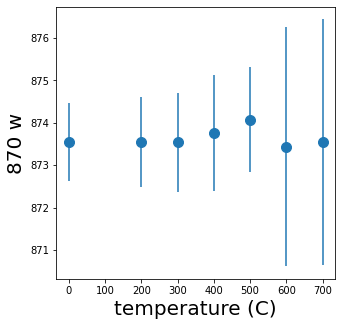

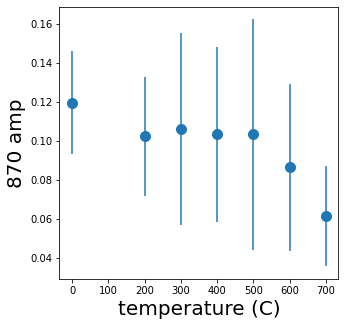

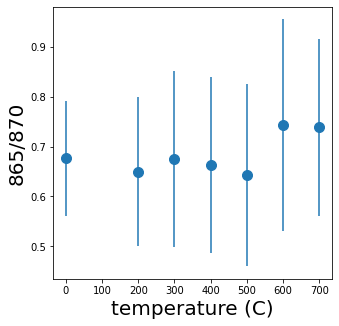

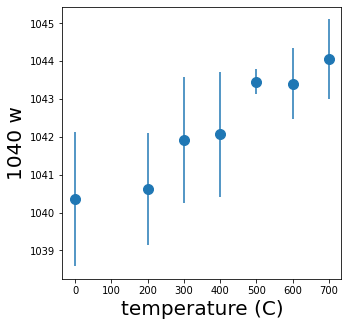

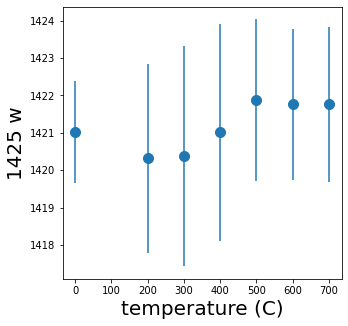

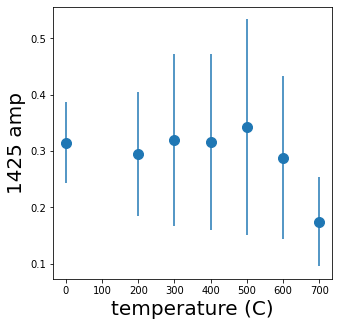

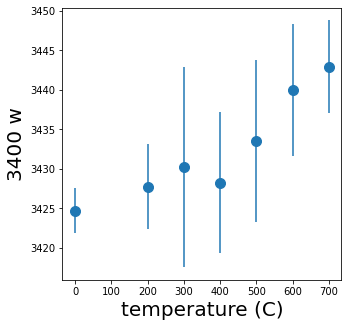

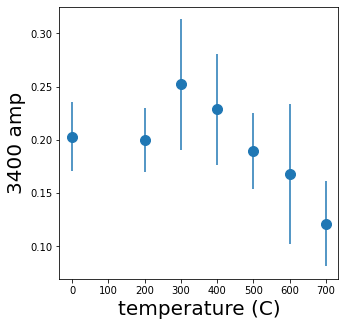

In [15]:
# Plot average features for data set

for feature in feature_df.drop(['sample','temperature'],axis=1).columns:
    plt.figure(figsize=(5,5))
    plt.errorbar(x=avg_df['temperature'],y=avg_df[feature],yerr=avg_df[feature+' std'], linestyle='none',marker='o',markersize=10)
    plt.xlabel('temperature (C)',fontsize=20)
    plt.ylabel(feature,fontsize=20)

# Plot entire data set

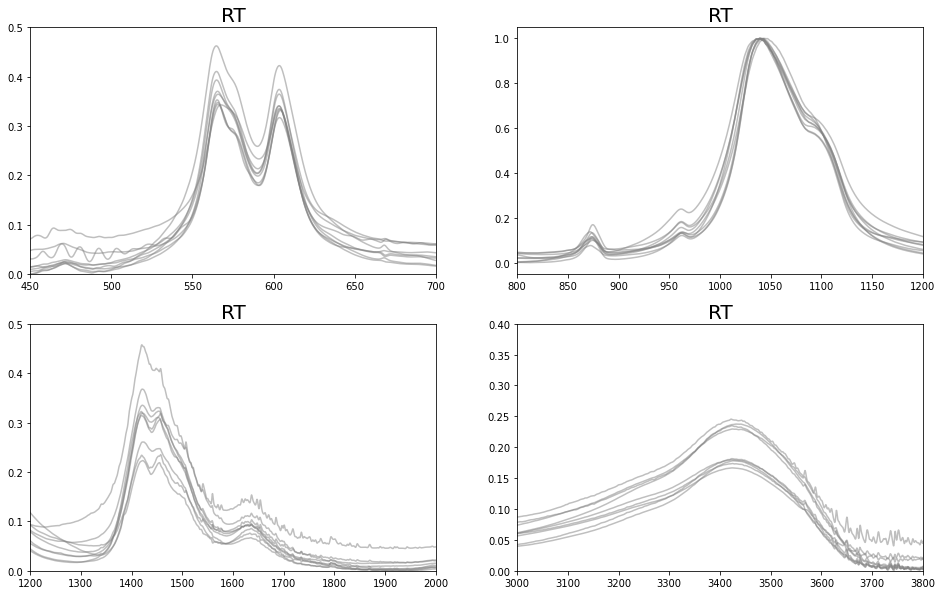

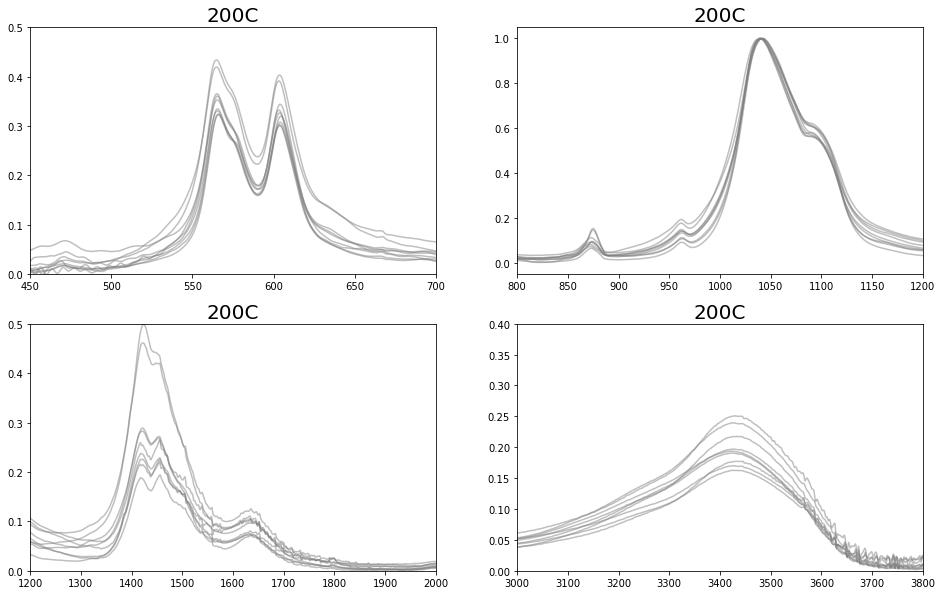

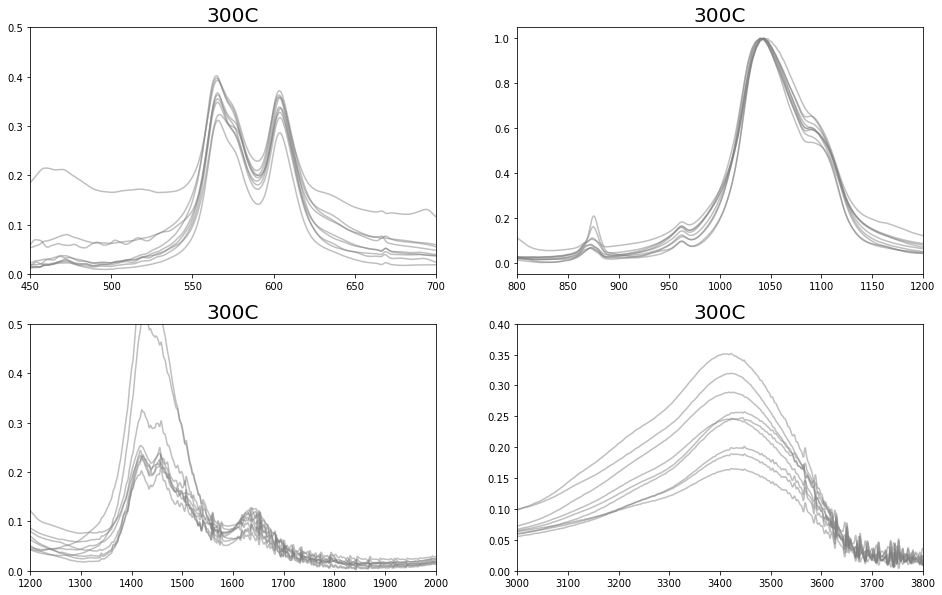

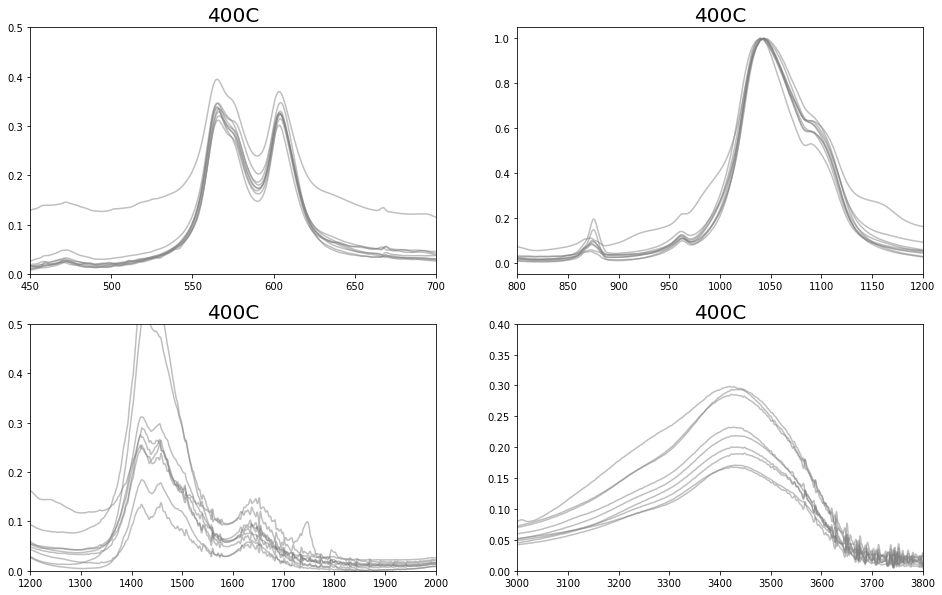

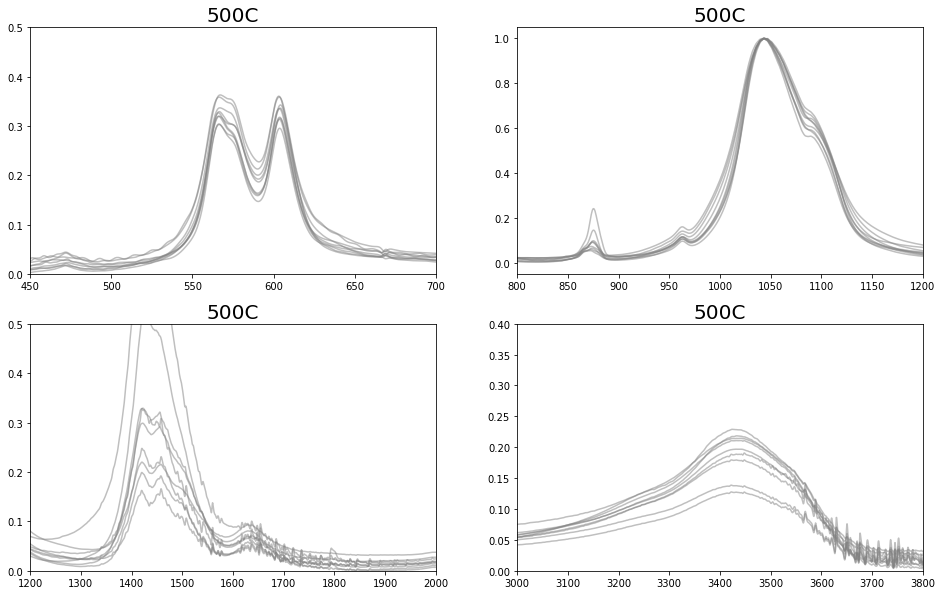

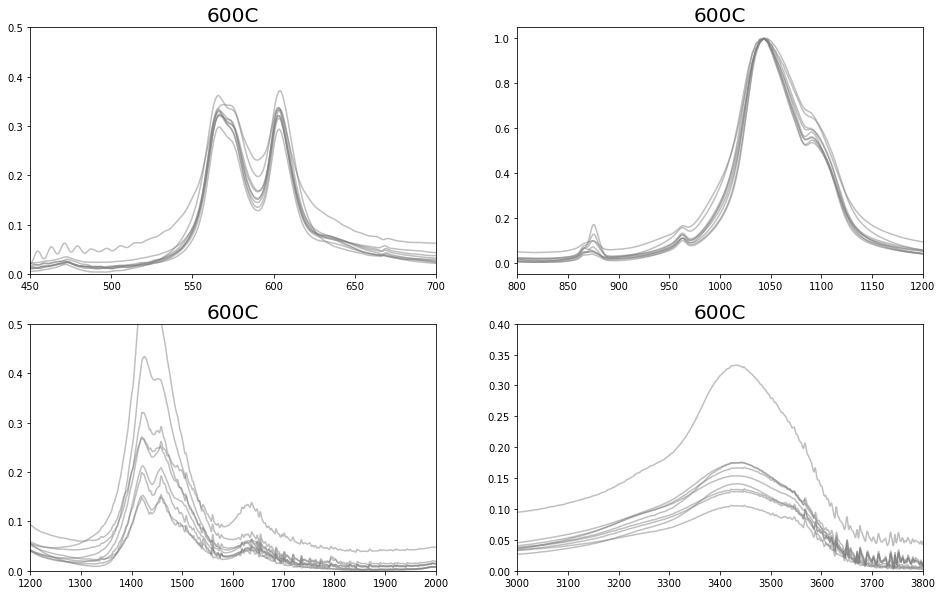

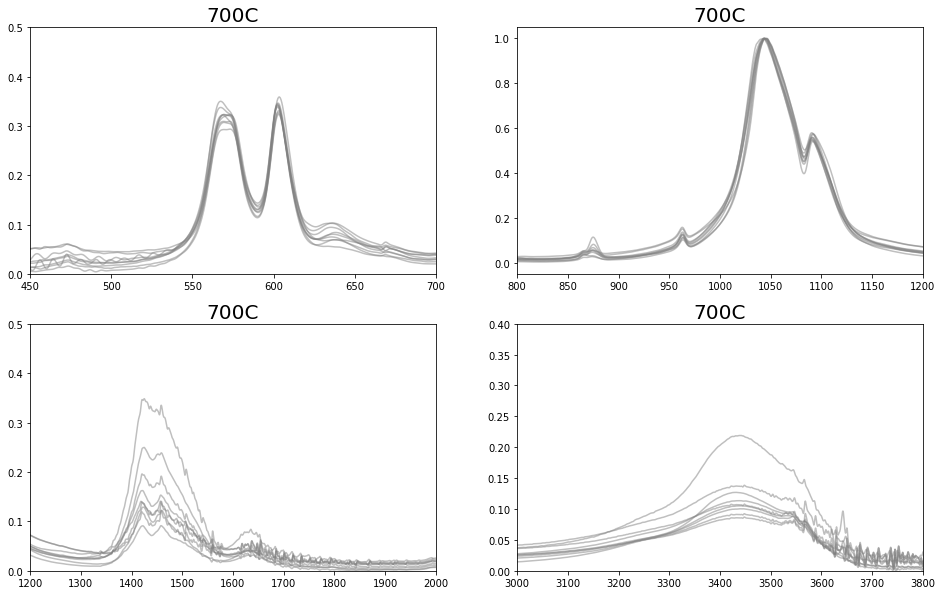

In [18]:
# Plot data set by temperature and wavenuber range
for T in temps:
    plt.figure(figsize=(16,10))
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax3 = plt.subplot(2,2,3)
    ax4 = plt.subplot(2,2,4)
    
    for S in sample_header:
        ax1.plot(data_dict[S+' '+T]['w'], data_dict[S+' '+T]['amp'], color='grey',alpha=0.5)
        ax2.plot(data_dict[S+' '+T]['w'], data_dict[S+' '+T]['amp'], color='grey',alpha=0.5)
        ax3.plot(data_dict[S+' '+T]['w'], data_dict[S+' '+T]['amp'], color='grey',alpha=0.5)
        ax4.plot(data_dict[S+' '+T]['w'], data_dict[S+' '+T]['amp'], color='grey',alpha=0.5)
    
    ax1.set_xlim([450,700])
    ax1.set_ylim([0,0.5])    
    ax2.set_xlim([800,1200])
    ax3.set_xlim([1200,2000])
    ax3.set_ylim([0,0.5])
    ax4.set_xlim([3000,3800])
    ax4.set_ylim([0,0.4])
    
    ax1.set_title(T,fontsize=20)
    ax2.set_title(T,fontsize=20)
    ax3.set_title(T,fontsize=20)
    ax4.set_title(T,fontsize=20)
    
        

# Setting up ML model

In [19]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Neural Networks
from sklearn.neural_network import MLPRegressor
from sklearn import datasets

In [216]:
# Data preperation and Normalization
X = feature_df.drop(['sample','temperature'],axis=1) # Predictors
y = feature_df[['temperature']]                      # target column

# Normalization (0 mean and standard dev of 1)
X = (X - X.mean())/X.std()

# Save training data feature summary (mean, std, etc...) for normalization of live data
train_data_summary = feature_df.drop(['sample','temperature'],axis=1).describe()
train_data_summary.to_csv('train_data_summary.csv')

In [345]:
# Split data into train and test groups
# training set with all the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40)

# training set with selected features
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X[[
                                               '560 w',
                                               '560 amp',
                                               '610 w',
                                               '560/610',
                                               '645/610',
                                               '865 shoulder',
                                               '1040 w',
                                               '3400 w']], y, test_size=0.2, random_state=40)

In [346]:
# Create and fit Neural network model
# description of parameters can be found rom scikit-learn.org
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

MLPR_model_1 = MLPRegressor(
    activation='relu',
    solver='sgd',
    hidden_layer_sizes=(20),
    alpha=0.01,
    random_state=30,
    early_stopping=False
    )
MLPR_model_1.fit(X_train_2, y_train_2.values.ravel())

MLPRegressor(alpha=0.01, hidden_layer_sizes=20, random_state=30, solver='sgd')

In [347]:
# Save model parameters to file for live prediction
filename = 'NN_model_bones.sav'
pickle.dump(MLPR_model_1, open(filename, 'wb'))

Absolute Mean Error: 98.21330953502844


Text(0, 0.5, 'Predicted Temperature (C)')

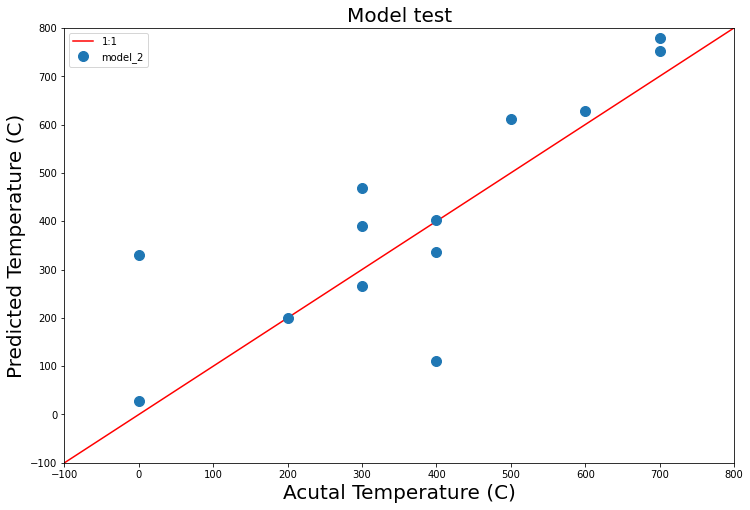

In [348]:
# Absolute mean error
MLPR_pred_2 = MLPR_model_1.predict(X_test_2)  # Predict temperatures on test data
MLPR_abs_err = metrics.mean_absolute_error(y_test_2,MLPR_pred_2)
print('Absolute Mean Error: '+str(MLPR_abs_err))

# Plot test results
plt.figure(figsize=(12,8))

line = [[-100,800],[-100,800]]
plt.plot(line[0],line[1],color='red')
#plt.plot(test['temperature'],pred_1,linestyle='none',marker='o')

plt.plot(y_test_2,MLPR_pred_2,linestyle='none',marker='o', markersize=10)

plt.title('Model test',fontsize=20)
plt.xlim([-100,800])
plt.ylim([-100,800])
plt.legend(['1:1','model_2'])
plt.xlabel('Acutal Temperature (C)',fontsize=20)
plt.ylabel('Predicted Temperature (C)',fontsize=20)

Text(0.5, 1.0, 'Model residual distribution')

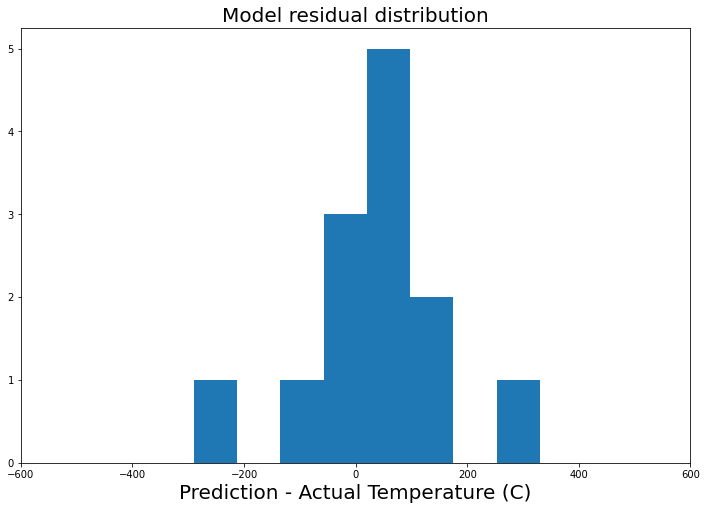

In [349]:
plt.figure(figsize=(12,8))
plt.hist(MLPR_pred_2 - y_test_2['temperature'],bins=8)
plt.xlim([-600, 600])
plt.xlabel('Prediction - Actual Temperature (C)',fontsize=20)
plt.title('Model residual distribution',fontsize=20)

# Testing modern bones

In [350]:
# Import model parameters
filename = 'NN_model_bones.sav'   # Model filename
model = pickle.load(open(filename, 'rb'))

# Import training data summary (mean, std, etc...) for feature normalization
train_data_summary = pd.read_csv('train_data_summary.csv').set_index('Unnamed: 0')
train_data_summary.index.name = None 

In [351]:
# load modern bone files, setup the features, normalize features, and use model for prediction
# store the actual temperature and prediction 

modern_header = ['@M1','@M2','@M3'] # prefix of filename for modern bone dataset
modern_temp    = [200,300,400,500,600,700] # range of temperatures, excluding RT data

temp = []
pred_temp = []
for m in modern_header:
    for T in modern_temp:
        filename = 'modern_bones_baselined/'+m+' '+str(T)+'C.csv'
        modern_data = pd.read_csv(filename, names=['w','amp'],header=None)
        
        features = fun.feature_setup(modern_data)
        features_norm = (features - train_data_summary.loc['mean'])/train_data_summary.loc['std'] # normalize feature df
        features_norm = features_norm[['560 w',
                           '560 amp',
                           '610 w',
                           '560/610',
                           '645/610',
                           '865 shoulder',
                           '1040 w',
                           '3400 w']]
        temp.append(T)
        pred_temp.append(model.predict(features_norm))

Text(0, 0.5, 'Predicted temperature (C)')

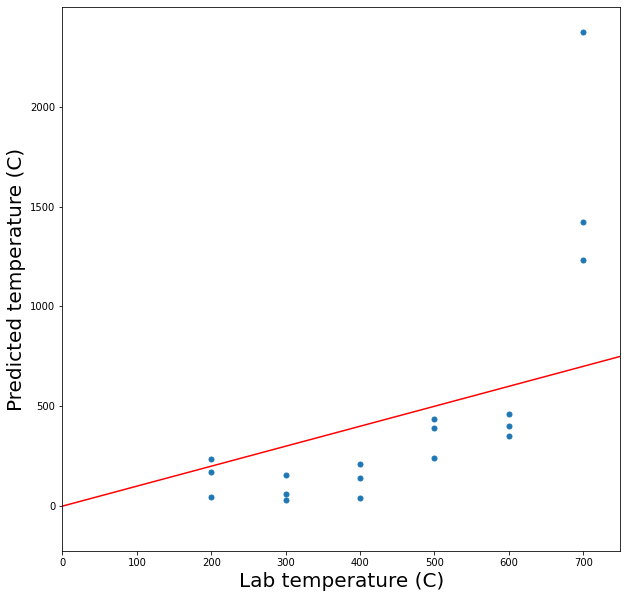

In [352]:
plt.figure(figsize=(10,10))
line = [[-100,800],[-100,800]]
plt.plot(line[0],line[1],color='red')
plt.plot(temp,pred_temp,linestyle='none',marker='o',markersize=5)
plt.xlim([0,750])
plt.xlabel('Lab temperature (C)',fontsize=20)
plt.ylabel('Predicted temperature (C)',fontsize=20)

# Removing bad/outlier data sets

In [176]:
# spectra with large 645/610 ratios
feature_df[feature_df['645/610'] > 0.5]

,sample,temperature,560 w,560 amp,610 w,610 amp,645 shoulder,645/610,865 shoulder,870 w,870 amp,865/870,1040 w,1425 w,1425 amp,3400 w,3400 amp
64,W15_1 200C,200,554.91640,0.08930,610.84190,0.04721,0.04373,0.92615,0.02340,889.50540,0.03308,0.70730,"1,081.38800","1,401.51300",0.05469,"3,415.79700",0.18292
65,W15_1 300C,300,557.80910,0.05611,608.91350,0.02080,0.01731,0.83242,0.01905,876.00620,0.02905,0.65589,"1,088.62000","1,420.31600",0.05654,"3,448.09900",0.10204
66,W15_1 400C,400,557.80910,0.04324,613.25250,0.01074,0.01008,0.93898,0.01284,889.50540,0.01921,0.66834,"1,085.72700","1,400.06700",0.03215,"3,422.06500",0.08105
67,W15_1 500C,500,555.88060,0.03718,613.73460,0.01411,0.01363,0.96541,0.01622,889.50540,0.02089,0.77622,"1,085.72700","1,400.06700",0.03169,"3,448.09900",0.10316
68,W15_1 600C,600,555.39850,0.03962,618.55580,0.01156,0.01036,0.89640,0.01590,889.50540,0.02204,0.72133,"1,085.24500","1,400.06700",0.03626,"3,448.09900",0.06560
69,W15_1 700C,700,553.47000,0.05345,619.52000,0.00965,0.00831,0.86102,0.01685,889.50540,0.02523,0.66779,"1,081.87000","1,400.06700",0.05408,"3,448.09900",0.05883


(400.0, 1000.0)

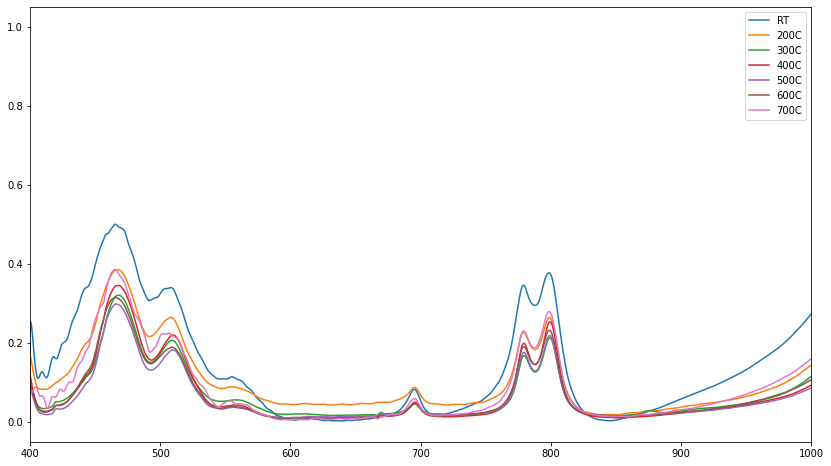

In [183]:
pre = 'W15_1 '

plt.figure(figsize=(14,8))
for T in temps:
    plt.plot(data_dict[pre+T]['w'],  data_dict[pre+T]['amp'])

plt.legend(temps.keys())
plt.xlim([400,1000])

(400.0, 2000.0)

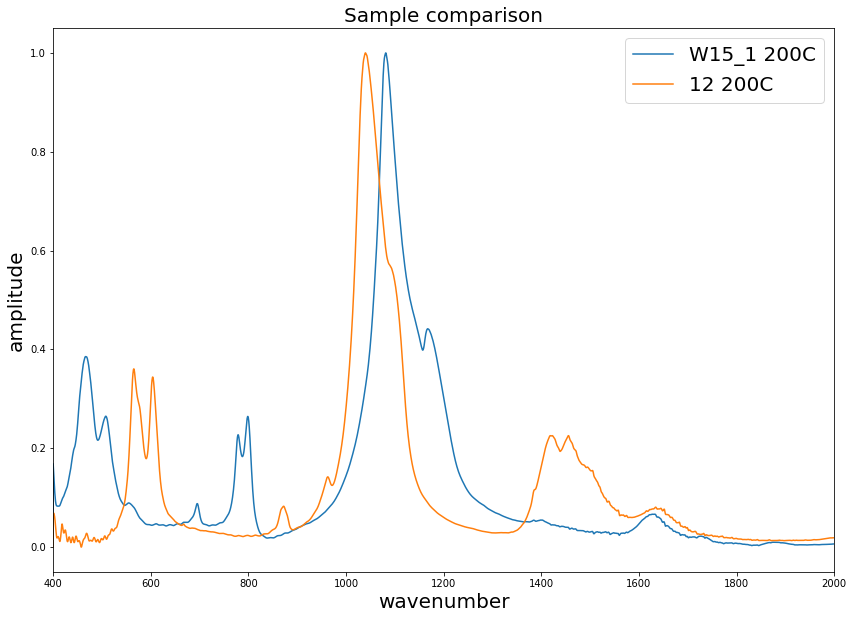

In [195]:
plt.figure(figsize=(14,10))
plt.plot(data_dict['W15_1 200C']['w'],data_dict['W15_1 200C']['amp'])
#plt.plot(data_dict['W15_1 RT']['w'],data_dict['W15_1 RT']['amp'])
plt.plot(data_dict['12 200C']['w'],data_dict['12 200C']['amp'])
plt.legend(['W15_1 200C','12 200C'],fontsize=20)
plt.xlabel('wavenumber',fontsize=20)
plt.ylabel('amplitude',fontsize=20)
plt.title('Sample comparison',fontsize=20)

plt.xlim([400,2000])